In [1]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import tensorflow as tf 
print ("Done")

Done


# Importing Data 

                                              Ravdess Dataframe
Here is the filename identifiers as per the official RAVDESS website:

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:

* Video-only (02)
* Speech (01)
* Fearful (06)
* Normal intensity (01)
* Statement "dogs" (02)
* 1st Repetition (01)
* 12th Actor (12) - Female (as the actor ID number is even)

In [2]:
#preparing data set

ravdess = r"C:\Users\peddi\OneDrive\Desktop\Mini\ravdess"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


# preprocessing

**Ravdees**

In [3]:
import os

file_emotion = []
file_path = []

ravdess = r"C:\Users\peddi\OneDrive\Desktop\Mini\ravdess"  # update this with your full path if needed

# Get the list of all actor directories
ravdess_directory_list = os.listdir(ravdess)

for actor_dir in ravdess_directory_list:
    actor_folder_path = os.path.join(ravdess, actor_dir)
    
    # Loop through each .wav file in the actor's folder
    for file_name in os.listdir(actor_folder_path):
        if file_name.endswith(".wav"):
            parts = file_name.split('.')[0].split('-')
            emotion = int(parts[2])  # 3rd part is the emotion label
            file_emotion.append(emotion)
            file_path.append(os.path.join(actor_folder_path, file_name))


In [4]:
print(ravdess_directory_list[0])  # Assuming 'actor' refers to the first actor in the directory list
print(parts[0])  # 'parts' is already defined
print(file_path[0])  # 'file_path' is already defined
print(int(parts[2]))  # 'parts' is already defined
print(file_name)  # Assuming 'f' refers to 'file_name'

Actor_01
03
C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\Actor_01\03-01-01-01-01-02-01.wav
6
03-01-06-02-01-02-24.wav


In [5]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())



  Emotions                                               Path
0  neutral  C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\A...
1  neutral  C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\A...
2  neutral  C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\A...
3  neutral  C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\A...
4  neutral  C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\A...
______________________________________________
     Emotions                                               Path
1416     fear  C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\A...
1417     fear  C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\A...
1418     fear  C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\A...
1419     fear  C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\A...
1420     fear  C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\A...
_______________________________________________
Emotions
neutral     287
happy       192
sad         192
angry       192
fear        190
disgust     184
surprise    184
Name: count, dtype: in

**Integration**

In [6]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([ravdess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\A...
1,neutral,C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\A...
2,neutral,C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\A...
3,neutral,C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\A...
4,neutral,C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\A...


In [7]:
print(data_path.Emotions.value_counts())


Emotions
neutral     287
happy       192
sad         192
angry       192
fear        190
disgust     184
surprise    184
Name: count, dtype: int64


>*                           Data Visualisation and Exploration

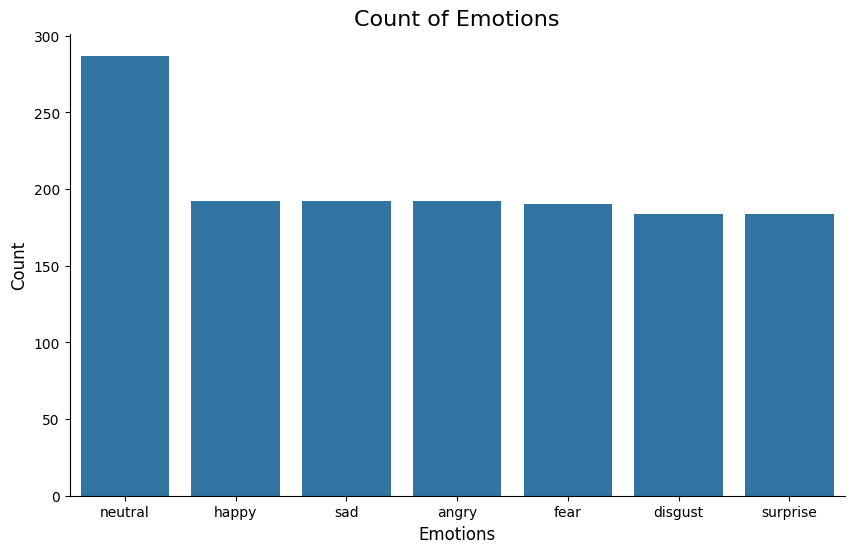

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: If not already done, load your data into a DataFrame
# data_path = pd.read_csv('your_dataset.csv')

plt.figure(figsize=(10, 6))
plt.title('Count of Emotions', size=16)

# Correct usage of seaborn countplot
sns.countplot(x='Emotions', data=data_path)

plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


In [9]:
data,sr = librosa.load(file_path[0])
sr

22050

In [10]:
ipd.Audio(data,rate=sr)

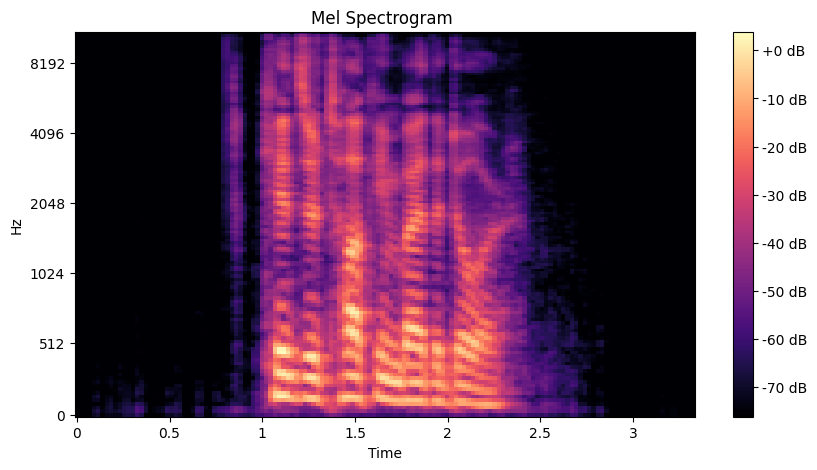

In [11]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

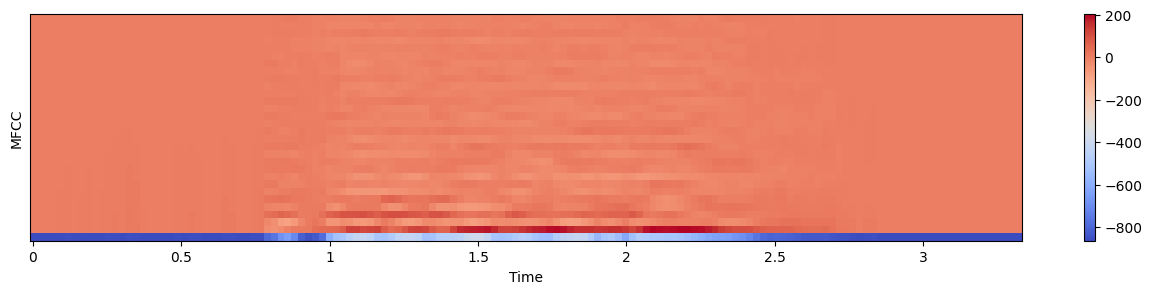

In [12]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

# Data augmentation

In [13]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

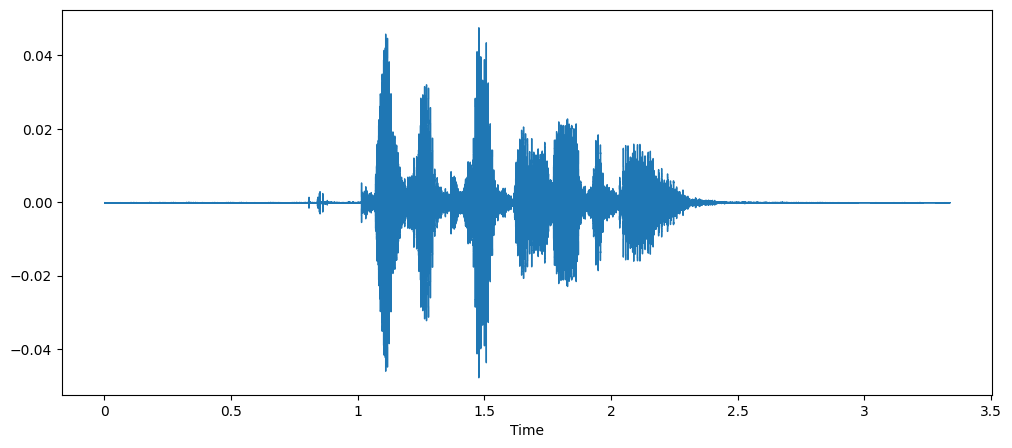

In [14]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

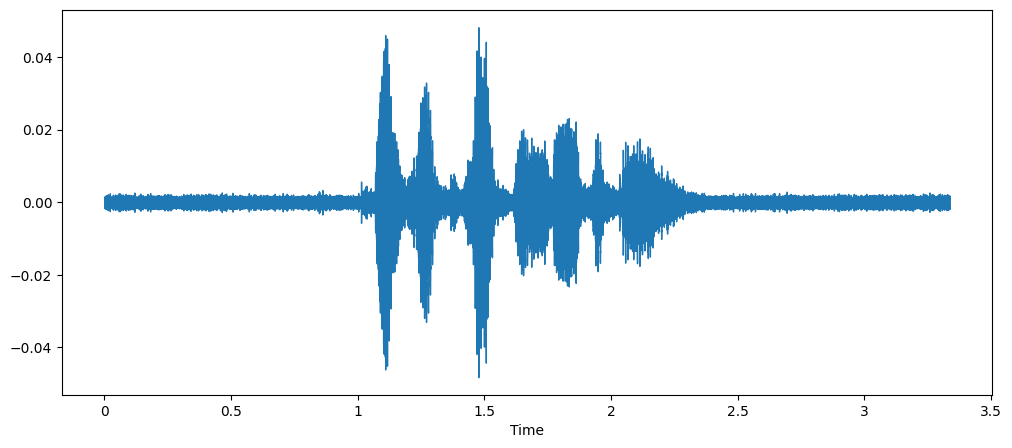

In [15]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

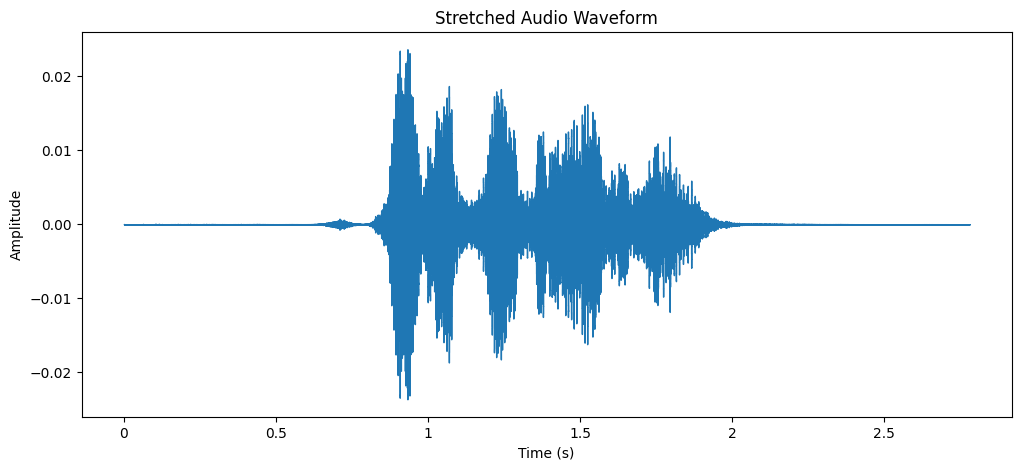

In [16]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

# Load your audio file
data, sr = librosa.load(file_path[0])  # Replace with your actual path

# Apply time stretching
x = librosa.effects.time_stretch(data, rate=1.2)  # Stretch by 20% faster; <1.0 will slow it down

# Plot the stretched waveform
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
plt.title('Stretched Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Play the stretched audio
ipd.Audio(x, rate=sr)


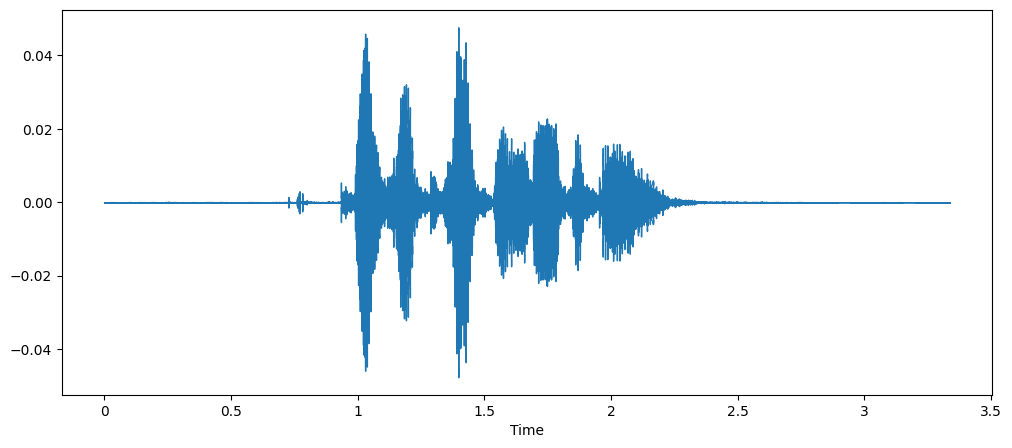

In [17]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

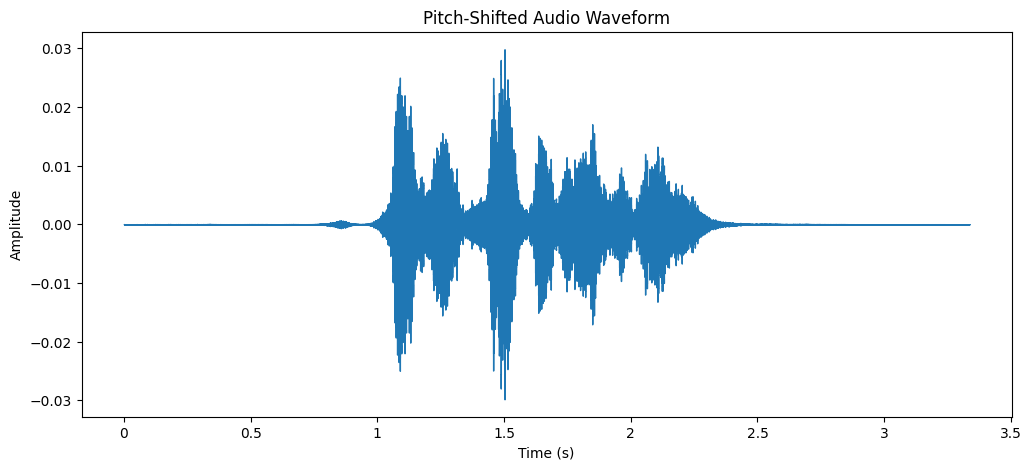

In [18]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

# Load audio
data, sr = librosa.load(file_path[0])  # Replace with actual file path

# Apply pitch shift: n_steps > 0 raises pitch, < 0 lowers pitch
x = librosa.effects.pitch_shift(data, sr=sr, n_steps=4)  # Raise pitch by 4 semitones

# Plot the pitch-shifted waveform
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
plt.title('Pitch-Shifted Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Play the pitch-shifted audio
ipd.Audio(x, rate=sr)


# Feature extraction

In [19]:
import librosa
import numpy as np

def zcr(data, frame_length=2048, hop_length=512):
    """
    Compute the Zero Crossing Rate (ZCR) of the audio signal.
    """
    zcr = librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    """
    Compute the Root Mean Square Error (RMSE) of the audio signal.
    """
    rms = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rms)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    """
    Compute the Mel-Frequency Cepstral Coefficients (MFCCs) of the audio signal.
    """
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13, hop_length=hop_length, n_fft=frame_length)
    return mfccs.flatten() if flatten else mfccs

def pitch_shift(data, sr, n_steps):
    """
    Apply pitch shifting to the audio data.
    """
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=n_steps)

def noise(data, noise_factor=0.005):
    """
    Add random noise to the audio signal.
    """
    noise = np.random.randn(len(data))
    return data + noise_factor * noise

def extract_features(data, sr=22050, frame_length=2048, hop_length=512):
    """
    Extract features from the audio signal including ZCR, RMSE, and MFCC.
    """
    result = np.array([])
    result = np.hstack((
        zcr(data, frame_length, hop_length),
        rmse(data, frame_length, hop_length),
        mfcc(data, sr, frame_length, hop_length)
    ))
    return result

def get_features(path, duration=2.5, offset=0.6):
    """
    Extract features from an audio file including original, noised, pitched, and pitched-noised versions.
    """
    # Load the audio data
    data, sr = librosa.load(path, duration=duration, offset=offset)
    
    # Extract features from original audio
    aud = extract_features(data, sr)
    audio = np.array([aud])
    
    # Add noise and extract features from noised audio
    noised_audio = noise(data)
    aud2 = extract_features(noised_audio, sr)
    audio = np.vstack((audio, aud2))
    
    # Apply pitch shifting and extract features
    pitched_audio = pitch_shift(data, sr, n_steps=4)  # Apply pitch shift (can modify n_steps)
    aud3 = extract_features(pitched_audio, sr)
    audio = np.vstack((audio, aud3))
    
    # Apply pitch shifting to noised audio and extract features
    pitched_audio1 = pitch_shift(data, sr, n_steps=4)
    pitched_noised_audio = noise(pitched_audio1)
    aud4 = extract_features(pitched_noised_audio, sr)
    audio = np.vstack((audio, aud4))
    
    return audio


In [20]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  8


# Faster way to get features

In [21]:
from joblib import Parallel, delayed
import timeit

start = timeit.default_timer()

# Define a function to get features for a single audio file
def process_feature(path, emotion):
    features = get_features(path)
    X = []
    Y = []
    for ele in features:
        X.append(ele)
        Y.append(emotion)  # append emotion for each augmented sample
    print(f"Processed: {path}")  # Print after processing one file
    return X, Y

# Extract paths and emotions
paths = data_path.Path
emotions = data_path.Emotions

# Run the processing in parallel
results = Parallel(n_jobs=-1, verbose=10)(
    delayed(process_feature)(path, emotion) for path, emotion in zip(paths, emotions)
)

# Collect all features and labels
X = []
Y = []
for result in results:
    x, y = result
    X.extend(x)
    Y.extend(y)

stop = timeit.default_timer()
print('Time taken: ', stop - start, 'seconds')


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

Time taken:  83.18979410000009 seconds


[Parallel(n_jobs=-1)]: Done 1421 out of 1421 | elapsed:  1.4min finished


In [22]:
len(X), len(Y), data_path.Path.shape


(5684, 5684, (1421,))

# Saving features

In [23]:
import pandas as pd

# Assuming X (features) and Y (labels) are already defined
# Create the DataFrame from X and Y
Emotions = pd.DataFrame(X)

# Add the 'Emotions' column with the target labels Y
Emotions['Emotions'] = Y

# Save the DataFrame to a CSV file
Emotions.to_csv('emotion.csv', index=False)

# Display the first few rows of the DataFrame
Emotions.head()


,0,1,2,3,4,5,6,7,8,9,...,1611,1612,1613,1614,1615,1616,1617,1618,1619,Emotions
0,0.130371,0.262207,0.422363,0.481445,0.394043,0.404297,0.391602,0.458984,0.554688,0.513672,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
1,0.253906,0.377930,0.502441,0.495117,0.491699,0.492676,0.496094,0.498047,0.510742,0.506836,...,2.923771,-1.559373,-0.988298,-2.073450,-6.116269,-2.550781,1.756444,1.209488,1.224827,neutral
2,0.227539,0.306152,0.414062,0.416504,0.400391,0.399414,0.410156,0.428223,0.441406,0.468262,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
3,0.244629,0.362793,0.487305,0.493652,0.494629,0.505859,0.510254,0.495605,0.500488,0.494141,...,3.610110,3.489499,1.650680,2.085588,1.575679,-1.278850,-0.662529,3.624639,2.592912,neutral
4,0.053223,0.143555,0.143555,0.309082,0.403809,0.453613,0.613281,0.615234,0.637207,0.628906,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [24]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,1611,1612,1613,1614,1615,1616,1617,1618,1619,Emotions
0,0.130371,0.262207,0.422363,0.481445,0.394043,0.404297,0.391602,0.458984,0.554688,0.513672,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
1,0.253906,0.377930,0.502441,0.495117,0.491699,0.492676,0.496094,0.498047,0.510742,0.506836,...,2.923771,-1.559373,-0.988298,-2.073450,-6.116269,-2.550781,1.756444,1.209488,1.224827,neutral
2,0.227539,0.306152,0.414062,0.416504,0.400391,0.399414,0.410156,0.428223,0.441406,0.468262,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
3,0.244629,0.362793,0.487305,0.493652,0.494629,0.505859,0.510254,0.495605,0.500488,0.494141,...,3.610110,3.489499,1.650680,2.085588,1.575679,-1.278850,-0.662529,3.624639,2.592912,neutral
4,0.053223,0.143555,0.143555,0.309082,0.403809,0.453613,0.613281,0.615234,0.637207,0.628906,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [25]:
print(Emotions.isna().any())


0           False
1           False
2           False
3           False
4           False
            ...  
1616         True
1617         True
1618         True
1619         True
Emotions    False
Length: 1621, dtype: bool


In [26]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
1616        False
1617        False
1618        False
1619        False
Emotions    False
Length: 1621, dtype: bool


(5684, 1621)

In [27]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
1616        0
1617        0
1618        0
1619        0
Emotions    0
Length: 1621, dtype: int64

# Data preparation

In [28]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [29]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


In [30]:
print(Y.shape)
X.shape

(5684, 7)


(5684, 1620)

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4547, 1620), (4547, 7), (1137, 1620), (1137, 7))

In [32]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [33]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4547, 1620), (4547, 7), (1137, 1620), (1137, 7))

In [34]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

> Applying early stopping for all models


In [35]:

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)


# CNN+LSTM model

In [36]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((4547, 1620, 1), (4547, 7), (1137, 1620, 1), (1137, 7))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Conv1D, MaxPool1D, BatchNormalization, Flatten, Dense
import tensorflow.keras.layers as L


model = tf.keras.Sequential([
    L.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    
    L.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    Dropout(0.2),
    
    L.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3, strides=2, padding='same'),
    Dropout(0.2),
    L.LSTM(128),
    L.Dropout(0.3),
    L.Flatten(),
    L.Dense(256, activation='relu'),
    L.BatchNormalization(),
    L.Dense(7, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [38]:
history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.4100 - loss: 1.8020 - val_accuracy: 0.2067 - val_loss: 5.8032 - learning_rate: 0.0010
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.6529 - loss: 0.9563 - val_accuracy: 0.2102 - val_loss: 5.5657 - learning_rate: 0.0010
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.7530 - loss: 0.6952 - val_accuracy: 0.2146 - val_loss: 5.3386 - learning_rate: 0.0010
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.8091 - loss: 0.5572 - val_accuracy: 0.2630 - val_loss: 3.8059 - learning_rate: 0.0010
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.7859 - loss: 0.6012 - val_accuracy: 0.3105 - val_loss: 2.4660 - learning_rate: 0.0010
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.8648 - loss: 0.3985 - val_accuracy: 0.3738 - val_loss: 2.1199 - learning_rate: 0.0010
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9273 - loss: 0.2530 - val_acc

36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - accuracy: 0.7383 - loss: 0.8887
Accuracy of our model on test data :  73.79067540168762 %


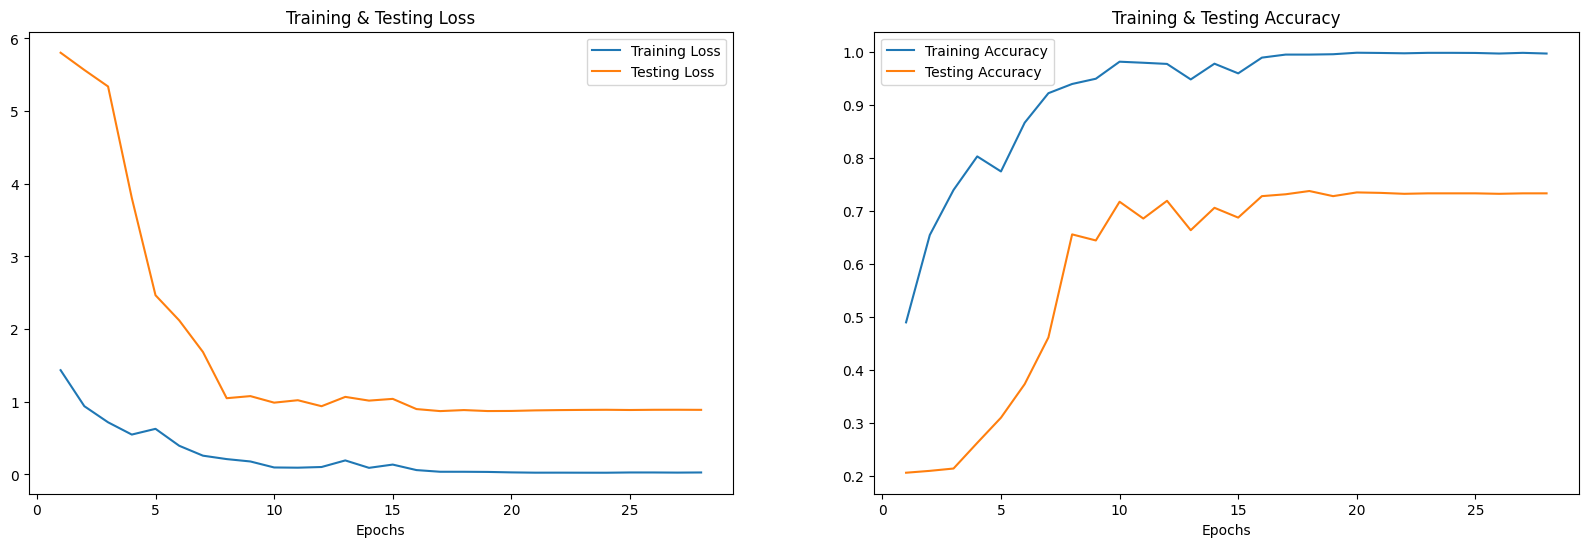

In [54]:
# Evaluating the model accuracy on test data
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn, y_test)[1] * 100 , "%")

# Use the number of epochs that the model was actually trained for
epochs = range(1, len(history.history['accuracy']) + 1)  # Automatically adjust to the actual number of epochs

# Set up subplots for training and testing loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Extract training and testing metrics from history
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

# Plot Training & Testing Loss
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

# Plot Training & Testing Accuracy
ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, test_acc, label='Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")

# Show the plots
plt.show()


In [55]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step


,Predicted Labels,Actual Labels
0,fear,neutral
1,sad,sad
2,happy,fear
3,surprise,surprise
4,happy,fear
5,happy,happy
6,surprise,surprise
7,fear,fear
8,neutral,neutral
9,neutral,neutral


In [57]:
df0

,Predicted Labels,Actual Labels
0,fear,neutral
1,sad,sad
2,happy,fear
3,surprise,surprise
4,happy,fear
...,...,...
1132,neutral,neutral
1133,surprise,surprise
1134,neutral,neutral
1135,surprise,fear


# Evalutation

Results of best model

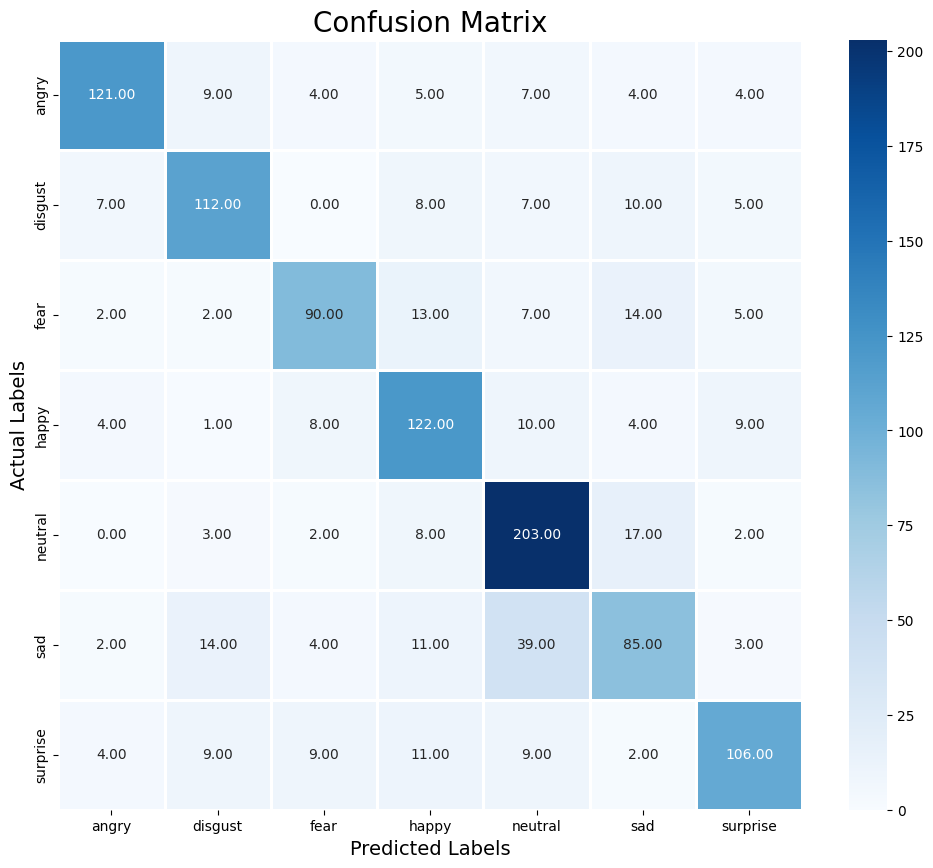

              precision    recall  f1-score   support

       angry       0.86      0.79      0.82       154
     disgust       0.75      0.75      0.75       149
        fear       0.77      0.68      0.72       133
       happy       0.69      0.77      0.73       158
     neutral       0.72      0.86      0.79       235
         sad       0.62      0.54      0.58       158
    surprise       0.79      0.71      0.75       150

    accuracy                           0.74      1137
   macro avg       0.74      0.73      0.73      1137
weighted avg       0.74      0.74      0.74      1137



In [58]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

# Saving Best Model

In [59]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
# Save model weights again
model.save_weights(r"C:\Users\peddi\OneDrive\Desktop\Mini\best_model1.weights.h5")
print("Saved model weights to disk")
 

Saved model weights to disk


In [60]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open(r"C:\Users\peddi\OneDrive\Desktop\Mini\CNN_model.json")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(r"C:\Users\peddi\OneDrive\Desktop\Mini\best_model1.weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [61]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - accuracy: 0.7383 - loss: 0.8887
compile_metrics: 73.79%


# Saving and Loading our Stnadrad Scaler and encoder
* To save the StandardScaler object to use it later in a Flask API

pickle file


In [63]:
import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

    
print("Done")    

Done


# Test script
* That can predict new record 

In [64]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open(r"C:\Users\peddi\OneDrive\Desktop\Mini\CNN_model.json")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(r"C:\Users\peddi\OneDrive\Desktop\Mini\best_model1.weights.h5")
print("Loaded model from disk")
import pickle

with open(r"C:\Users\peddi\OneDrive\Desktop\Mini\scaler2.pickle",'rb') as f:
    scaler2 = pickle.load(f)
    
with open(r"C:\Users\peddi\OneDrive\Desktop\Mini\encoder2.pickle", 'rb') as f:
    encoder2 = pickle.load(f)

    
print("Done")    

# Feature extraction functions
def zcr(data, frame_length=2048, hop_length=512):
    """ Compute Zero Crossing Rate (ZCR) of the audio signal. """
    zcr = librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    """ Compute Root Mean Square Error (RMSE) of the audio signal. """
    rms = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rms)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    """ Compute MFCCs of the audio signal. """
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13, hop_length=hop_length, n_fft=frame_length)
    return mfccs.flatten() if flatten else mfccs

def pad_or_truncate(feature, target_len):
    """ Ensure feature is the target length by padding or truncating. """
    if len(feature) < target_len:
        return np.pad(feature, (0, target_len - len(feature)))
    else:
        return feature[:target_len]

def extract_features(data, sr=22050, frame_length=2048, hop_length=512, fixed_frames=108):
    """ Extract ZCR, RMSE, and MFCC features from the audio signal. """
    zcr_feat = zcr(data, frame_length, hop_length)
    rmse_feat = rmse(data, frame_length, hop_length)
    mfcc_feat = mfcc(data, sr, frame_length, hop_length)

    # Ensure all features are of length `fixed_frames`
    zcr_feat = pad_or_truncate(zcr_feat, fixed_frames)
    rmse_feat = pad_or_truncate(rmse_feat, fixed_frames)
    mfcc_feat = pad_or_truncate(mfcc_feat, fixed_frames * 13)

    # Concatenate all features into a single feature vector
    result = np.hstack((zcr_feat, rmse_feat, mfcc_feat))
    return result

# Prediction function
def get_predict_feat(path):
    """ Extract features from audio and prepare them for prediction. """
    # Load the audio file, slice the audio segment as specified
    d, s_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # Extract features from the audio data
    res = extract_features(d)  # Extract the features
    print(f"Extracted features: {res}")
    print(f"Length of extracted features: {len(res)}")
    
    # Convert the extracted features to a NumPy array
    result = np.array(res)
    print(f"Shape of the result after conversion: {result.shape}")
    
    # Reshape the result into a 2D array (1, 1620) for model prediction
    result = result.reshape(1, -1)  # Reshape to (1, 1620)
    
    # Apply scaling or any transformation here
    i_result = scaler2.transform(result)  # Apply the scaling
    
    # Expand dimensions as needed (e.g., for the model input)
    final_result = np.expand_dims(i_result, axis=2)  # Expand to shape (1, 1620, 1) if needed
    
    # Return the final result (shape should match model input)
    return final_result
res = get_predict_feat(r"C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\Actor_18\03-01-01-01-02-01-18.wav")
print(res.shape)  # Should print (1, 1620, 1) if your features are correct
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model.predict(res)
    y_pred = encoder2.inverse_transform(predictions)
    print(y_pred[0][0]) 

Loaded model from disk
Done
Extracted features: [0.08398438 0.08398438 0.08398438 ... 0.         0.         0.        ]
Length of extracted features: 1620
Shape of the result after conversion: (1620,)
(1, 1620, 1)


In [65]:
prediction(r"C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\Actor_01\03-01-02-02-02-01-01.wav")

Extracted features: [ 0.          0.13867188  0.16699219 ...  4.21421862 11.54388237
 15.2916193 ]
Length of extracted features: 1620
Shape of the result after conversion: (1620,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
neutral


In [66]:
prediction(r"C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\Actor_16\03-01-04-01-01-02-16.wav")

Extracted features: [ 0.13720703  0.20654297  0.31005859 ... -1.34290946  3.59545565
  2.05693436]
Length of extracted features: 1620
Shape of the result after conversion: (1620,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
sad


In [67]:
%pip install sounddevice 
import sounddevice as sd
from scipy.io.wavfile import write
import librosa
import numpy as np
import os

# ------------------------------
# Record Audio and Save as .wav
# ------------------------------
def record_audio(duration=3, filename="mic_input.wav", sample_rate=22050):
    print("🎙️ Recording...")
    audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1)
    sd.wait()
    write(filename, sample_rate, audio)
    print(f"✅ Audio saved to: {filename}")
    return filename

if __name__ == "__main__":
    audio_file = record_audio(duration=3, filename="mic_input.wav")
    prediction(audio_file)


Note: you may need to restart the kernel to use updated packages.
🎙️ Recording...
✅ Audio saved to: mic_input.wav
Extracted features: [0.04882812 0.07275391 0.10253906 ... 0.         0.         0.        ]
Length of extracted features: 1620
Shape of the result after conversion: (1620,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
neutral


In [68]:
prediction(r"C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\Actor_24\03-01-03-01-01-02-24.wav")

Extracted features: [ 0.10253906  0.1796875   0.24951172 ... -3.27892613 -5.59779263
 -4.78810358]
Length of extracted features: 1620
Shape of the result after conversion: (1620,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
happy


In [69]:
prediction(r"C:\Users\peddi\OneDrive\Desktop\Mini\ravdess\Actor_24\03-01-01-01-02-01-24.wav")

Extracted features: [ 0.          0.          0.         ...  1.92575943 -2.36854982
 -4.4803462 ]
Length of extracted features: 1620
Shape of the result after conversion: (1620,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
neutral


In [72]:
prediction(r"C:\Users\peddi\OneDrive\Desktop\Mini\WhatsApp Audio 2025-05-03 at 10.33.38_0e3719cd.waptt.wav")

Extracted features: [0.02197266 0.02978516 0.04589844 ... 0.         0.         0.        ]
Length of extracted features: 1620
Shape of the result after conversion: (1620,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
angry


In [73]:
prediction(r"C:\Users\peddi\OneDrive\Desktop\Mini\WhatsApp Audio 2025-05-03 at 10.35.16_daf2714e.waptt.wav")

Extracted features: [ 0.01757812  0.02587891  0.03710938 ...  0.35840294 -4.72968531
 -3.84634972]
Length of extracted features: 1620
Shape of the result after conversion: (1620,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
sad


In [74]:
prediction(r"C:\Users\peddi\OneDrive\Desktop\Mini\WhatsApp Audio 2025-05-03 at 10.34.58_0f726e71.waptt.wav")

Extracted features: [ 0.02441406  0.04541016  0.06591797 ... -1.92689574  1.09376955
  5.30032206]
Length of extracted features: 1620
Shape of the result after conversion: (1620,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
happy
